<a href="https://colab.research.google.com/github/FVRDaniel/Creation-of-a-Database-and-Training-of-the-YOLO-Network/blob/main/Creation_of_a_Database_and_Training_of_the_YOLO_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics
from ultralytics import YOLO


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
# Criar diretório para os dados
!mkdir -p /content/coco

# Baixar imagens de treino (2017)
!wget -c http://images.cocodataset.org/zips/train2017.zip -O /content/coco/train2017.zip

# Baixar imagens de validação (2017)
!wget -c http://images.cocodataset.org/zips/val2017.zip -O /content/coco/val2017.zip

# Baixar anotações
!wget -c http://images.cocodataset.org/annotations/annotations_trainval2017.zip -O /content/coco/annotations_trainval2017.zip

# Extrair os arquivos
!unzip -q /content/coco/train2017.zip -d /content/coco/
!unzip -q /content/coco/val2017.zip -d /content/coco/
!unzip -q /content/coco/annotations_trainval2017.zip -d /content/coco/

print("Download e extração concluídos!")


--2025-02-14 15:10:57--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.27.174, 52.217.236.41, 3.5.24.180, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.27.174|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘/content/coco/train2017.zip’

/content/coco/train 100%[===================>]  18.01G  17.3MB/s    in 18m 18s 

2025-02-14 15:29:15 (16.8 MB/s) - ‘/content/coco/train2017.zip’ saved [19336861798/19336861798]

--2025-02-14 15:29:15--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.27.37, 16.182.106.121, 3.5.6.134, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.27.37|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘/content/coco/val2017.zip’

/content/coco/val20 100%[

In [ ]:
!pip install pycocotools


In [ ]:
from pycocotools.coco import COCO

# Caminho das anotações
annFile = "/content/coco/annotations/instances_train2017.json"

# Carregar dataset COCO
coco = COCO(annFile)



loading annotations into memory...
Done (t=18.19s)
creating index...
index created!


In [ ]:
# Listar todas as categorias disponíveis
categories = coco.loadCats(coco.getCatIds())
category_names = [fruits["name"] for fruits in categories]

print("Categorias disponíveis no COCO:")
print(category_names)


Categorias disponíveis no COCO:
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
# Obter os IDs das categorias desejadas
desired_categories = ["banana", "apple"]
category_ids = coco.getCatIds(catNms=desired_categories)

if not category_ids:
    print("Erro: Nenhuma categoria encontrada! Verifique os nomes das classes.")
else:
    print(f"IDs das categorias selecionadas: {category_ids}")


IDs das categorias selecionadas: [52, 55]


In [ ]:
import os
import json

# Criar diretórios para imagens e anotações
yolo_dataset_path = "/content/yolo_dataset"
os.makedirs(f"{yolo_dataset_path}/images", exist_ok=True)
os.makedirs(f"{yolo_dataset_path}/labels", exist_ok=True)

# Mapear IDs COCO para IDs YOLO
category_mapping = {category_id: idx for idx, category_id in enumerate(category_ids)}
print(f"Mapeamento de categorias para YOLO: {category_mapping}")

# Função para converter anotações COCO para YOLO
def convert_coco_to_yolo(coco, image_info, category_mapping):
    img_id = image_info["id"]
    width, height = image_info["width"], image_info["height"]

    annotation_ids = coco.getAnnIds(imgIds=img_id, catIds=list(category_mapping.keys()))
    annotations = coco.loadAnns(annotation_ids)

    if not annotations:
        print(f"Sem anotações para {image_info['file_name']}")
        return False

    label_path = f"{yolo_dataset_path}/labels/{image_info['file_name'].replace('.jpg', '.txt')}"

    with open(label_path, "w") as f:
        for ann in annotations:
            if "bbox" not in ann:
                print(f"Erro: Anotação sem bounding box para {image_info['file_name']}")
                continue

            x, y, w, h = ann["bbox"]
            x_center, y_center = (x + w / 2) / width, (y + h / 2) / height
            w, h = w / width, h / height
            class_id = category_mapping[ann["category_id"]]

            # Garantir que os valores são válidos
            if not (0 <= x_center <= 1 and 0 <= y_center <= 1 and 0 <= w <= 1 and 0 <= h <= 1):
                print(f"Erro: Bounding box fora do intervalo normalizado para {image_info['file_name']}")
                continue

            f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}\n")

    return True

# Processar as imagens filtradas
num_converted = 0
for img in coco.loadImgs(coco.getImgIds(catIds=category_ids)):
    img_path = f"/content/coco/train2017/{img['file_name']}"

    if not os.path.exists(img_path):
        print(f"Erro: Imagem {img['file_name']} não encontrada!")
        continue

    os.system(f"cp {img_path} {yolo_dataset_path}/images/")

    if convert_coco_to_yolo(coco, img, category_mapping):
        num_converted += 1

print(f"Conversão concluída! {num_converted} imagens processadas com sucesso.")


Mapeamento de categorias para YOLO: {52: 0, 53: 1}
Conversão concluída! 504 imagens processadas com sucesso.


In [ ]:
data_yaml = """train: /content/yolo_dataset/images
val: /content/yolo_dataset/images

nc: 2
names: ['orange', 'banana']
"""

with open("/content/yolo_dataset/data.yaml", "w") as f:
    f.write(data_yaml)

print("Arquivo data.yaml criado com sucesso!")


Arquivo data.yaml criado com sucesso!


In [ ]:
from ultralytics import YOLO

# Carregar modelo pré-treinado YOLOv8
model = YOLO("yolov8n.pt")  # 'n' é o modelo menor, troque por 's', 'm', 'l' se quiser versões maiores

# Treinar o modelo
results = model.train(
    data="/content/yolo_dataset/data.yaml",
    epochs=50,  # Número de épocas, pode aumentar se necessário
    imgsz=640,
    batch=16,
    device="cuda"  # Usa GPU, se disponível
)

print("Treinamento concluído!")


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/yolo_dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

train: Scanning /content/yolo_dataset/labels... 504 images, 1 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<00:00, 631.05it/s]


train: New cache created: /content/yolo_dataset/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/yolo_dataset/labels.cache... 504 images, 1 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.81G      1.417      2.795      1.355        114        640: 100%|██████████| 32/32 [00:11<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.42it/s]

                   all        505       3802      0.473     0.0582     0.0886     0.0499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.41G      1.502      2.183      1.393         98        640: 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.49it/s]

                   all        505       3802       0.32      0.176      0.162     0.0991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.67G      1.507      2.096      1.408        103        640: 100%|██████████| 32/32 [00:10<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.41it/s]


                   all        505       3802      0.283      0.224      0.144     0.0781

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.77G      1.528      2.081      1.432        107        640: 100%|██████████| 32/32 [00:10<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.14it/s]


                   all        505       3802      0.261      0.297      0.169      0.094

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.52G      1.451      2.009      1.411         88        640: 100%|██████████| 32/32 [00:09<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.70it/s]


                   all        505       3802      0.294      0.283      0.206      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       2.5G      1.472      1.953      1.411         88        640: 100%|██████████| 32/32 [00:10<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.10it/s]

                   all        505       3802      0.276      0.328      0.217       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.54G      1.469       1.93        1.4        139        640: 100%|██████████| 32/32 [00:10<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.81it/s]


                   all        505       3802      0.372      0.318      0.277      0.154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.43G      1.451      1.907      1.403        121        640: 100%|██████████| 32/32 [00:09<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.96it/s]


                   all        505       3802      0.374      0.341      0.279      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.41G       1.41      1.853       1.36        139        640: 100%|██████████| 32/32 [00:10<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.38it/s]

                   all        505       3802      0.437       0.34      0.319      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.51G      1.403      1.814       1.38        146        640: 100%|██████████| 32/32 [00:10<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.75it/s]

                   all        505       3802      0.393      0.356      0.314      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.54G      1.388      1.782      1.344        134        640: 100%|██████████| 32/32 [00:09<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.83it/s]

                   all        505       3802      0.425      0.384      0.356      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.52G        1.4      1.747      1.362        139        640: 100%|██████████| 32/32 [00:10<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.30it/s]

                   all        505       3802      0.504      0.402      0.405      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.69G      1.378       1.72      1.347        129        640: 100%|██████████| 32/32 [00:09<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.66it/s]

                   all        505       3802      0.502      0.396       0.41      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.41G      1.375      1.657      1.323        175        640: 100%|██████████| 32/32 [00:09<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.29it/s]


                   all        505       3802      0.446        0.4      0.367      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.66G      1.333      1.629      1.324        100        640: 100%|██████████| 32/32 [00:09<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.34it/s]

                   all        505       3802      0.478      0.391      0.383       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.45G      1.338      1.648      1.321        156        640: 100%|██████████| 32/32 [00:10<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.76it/s]


                   all        505       3802      0.498      0.421      0.413      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.67G       1.32      1.577      1.304         96        640: 100%|██████████| 32/32 [00:09<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.05it/s]

                   all        505       3802      0.493      0.414      0.419      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.51G      1.315      1.602      1.294        210        640: 100%|██████████| 32/32 [00:09<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.26it/s]

                   all        505       3802      0.512      0.428      0.439      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.59G      1.296      1.554      1.295         97        640: 100%|██████████| 32/32 [00:09<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.90it/s]

                   all        505       3802      0.525      0.466      0.472      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.42G      1.298      1.549      1.283        110        640: 100%|██████████| 32/32 [00:09<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.12it/s]


                   all        505       3802      0.556       0.46      0.478      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.56G      1.295      1.516      1.265         89        640: 100%|██████████| 32/32 [00:10<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.48it/s]

                   all        505       3802      0.534      0.465      0.478       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.43G      1.263      1.487      1.275         86        640: 100%|██████████| 32/32 [00:10<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.80it/s]

                   all        505       3802      0.591      0.465      0.512      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.75G      1.252      1.418      1.251        104        640: 100%|██████████| 32/32 [00:09<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.09it/s]


                   all        505       3802       0.59      0.502      0.538      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.51G      1.275      1.441      1.273        118        640: 100%|██████████| 32/32 [00:10<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.43it/s]

                   all        505       3802      0.577      0.504      0.536      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.52G      1.233      1.369      1.237        113        640: 100%|██████████| 32/32 [00:10<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.78it/s]

                   all        505       3802      0.576      0.499      0.529      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.71G      1.206      1.367      1.223         75        640: 100%|██████████| 32/32 [00:09<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.99it/s]


                   all        505       3802      0.616      0.509      0.559      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       2.6G      1.196      1.375      1.227        119        640: 100%|██████████| 32/32 [00:10<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.37it/s]

                   all        505       3802      0.636      0.523      0.575      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       2.5G      1.182      1.316      1.221        135        640: 100%|██████████| 32/32 [00:10<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.83it/s]

                   all        505       3802      0.633      0.542      0.586      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.51G      1.194      1.347      1.228        105        640: 100%|██████████| 32/32 [00:09<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.05it/s]


                   all        505       3802      0.618      0.545      0.585      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.41G      1.209      1.325      1.218        110        640: 100%|██████████| 32/32 [00:10<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.50it/s]

                   all        505       3802      0.679      0.534      0.612      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.42G      1.137      1.248      1.187        105        640: 100%|██████████| 32/32 [00:10<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.89it/s]

                   all        505       3802      0.684      0.549      0.625       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       2.6G      1.171      1.276      1.202        153        640: 100%|██████████| 32/32 [00:09<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.12it/s]

                   all        505       3802      0.673      0.567      0.629       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.88G      1.174      1.237      1.188        126        640: 100%|██████████| 32/32 [00:10<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.37it/s]

                   all        505       3802      0.662      0.571      0.621      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       2.4G      1.141      1.232      1.194         79        640: 100%|██████████| 32/32 [00:10<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.89it/s]


                   all        505       3802      0.698      0.589      0.655      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.46G       1.13      1.199      1.185         93        640: 100%|██████████| 32/32 [00:09<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.03it/s]

                   all        505       3802      0.731      0.574      0.664      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.86G       1.14      1.183       1.16         93        640: 100%|██████████| 32/32 [00:10<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.33it/s]

                   all        505       3802      0.726      0.595      0.676      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.58G      1.121      1.143      1.169        147        640: 100%|██████████| 32/32 [00:10<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.84it/s]

                   all        505       3802      0.725       0.62      0.685      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       2.6G        1.1      1.172      1.159         75        640: 100%|██████████| 32/32 [00:09<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.87it/s]

                   all        505       3802      0.734      0.606      0.687      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.43G      1.088      1.107      1.153        141        640: 100%|██████████| 32/32 [00:10<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.45it/s]

                   all        505       3802      0.742      0.613      0.698      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.43G      1.104      1.106      1.168         65        640: 100%|██████████| 32/32 [00:10<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.69it/s]

                   all        505       3802      0.769      0.616      0.713      0.517


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.26G       1.07      1.139      1.138         63        640: 100%|██████████| 32/32 [00:11<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.50it/s]

                   all        505       3802      0.744        0.6      0.696      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.29G      1.066      1.102      1.135         50        640: 100%|██████████| 32/32 [00:10<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.55it/s]

                   all        505       3802      0.767      0.626      0.711      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.29G      1.033      1.053      1.123         70        640: 100%|██████████| 32/32 [00:08<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.69it/s]

                   all        505       3802      0.769       0.63      0.722      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.28G      1.029      1.028       1.12         58        640: 100%|██████████| 32/32 [00:09<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.60it/s]


                   all        505       3802      0.785      0.639      0.735      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.23G      1.017     0.9909      1.099         43        640: 100%|██████████| 32/32 [00:09<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.34it/s]


                   all        505       3802      0.806      0.643      0.747      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.27G      1.005     0.9676      1.096         73        640: 100%|██████████| 32/32 [00:08<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.88it/s]

                   all        505       3802      0.819      0.644      0.755      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.28G       1.01     0.9379      1.091         77        640: 100%|██████████| 32/32 [00:09<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.37it/s]

                   all        505       3802      0.799      0.661      0.756      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.28G     0.9771     0.9306      1.086         96        640: 100%|██████████| 32/32 [00:09<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


                   all        505       3802      0.823      0.654      0.762      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.27G     0.9642      0.901      1.062         77        640: 100%|██████████| 32/32 [00:09<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.82it/s]

                   all        505       3802      0.798      0.675      0.766      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.28G     0.9802     0.9011      1.083         58        640: 100%|██████████| 32/32 [00:08<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.86it/s]

                   all        505       3802      0.809      0.675      0.769      0.577



50 epochs completed in 0.244 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.89it/s]


                   all        505       3802      0.809      0.675      0.769      0.577
                orange        504       1964      0.818      0.669       0.77      0.561
                banana        504       1838      0.799      0.682      0.768      0.593
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train2
Treinamento concluído!


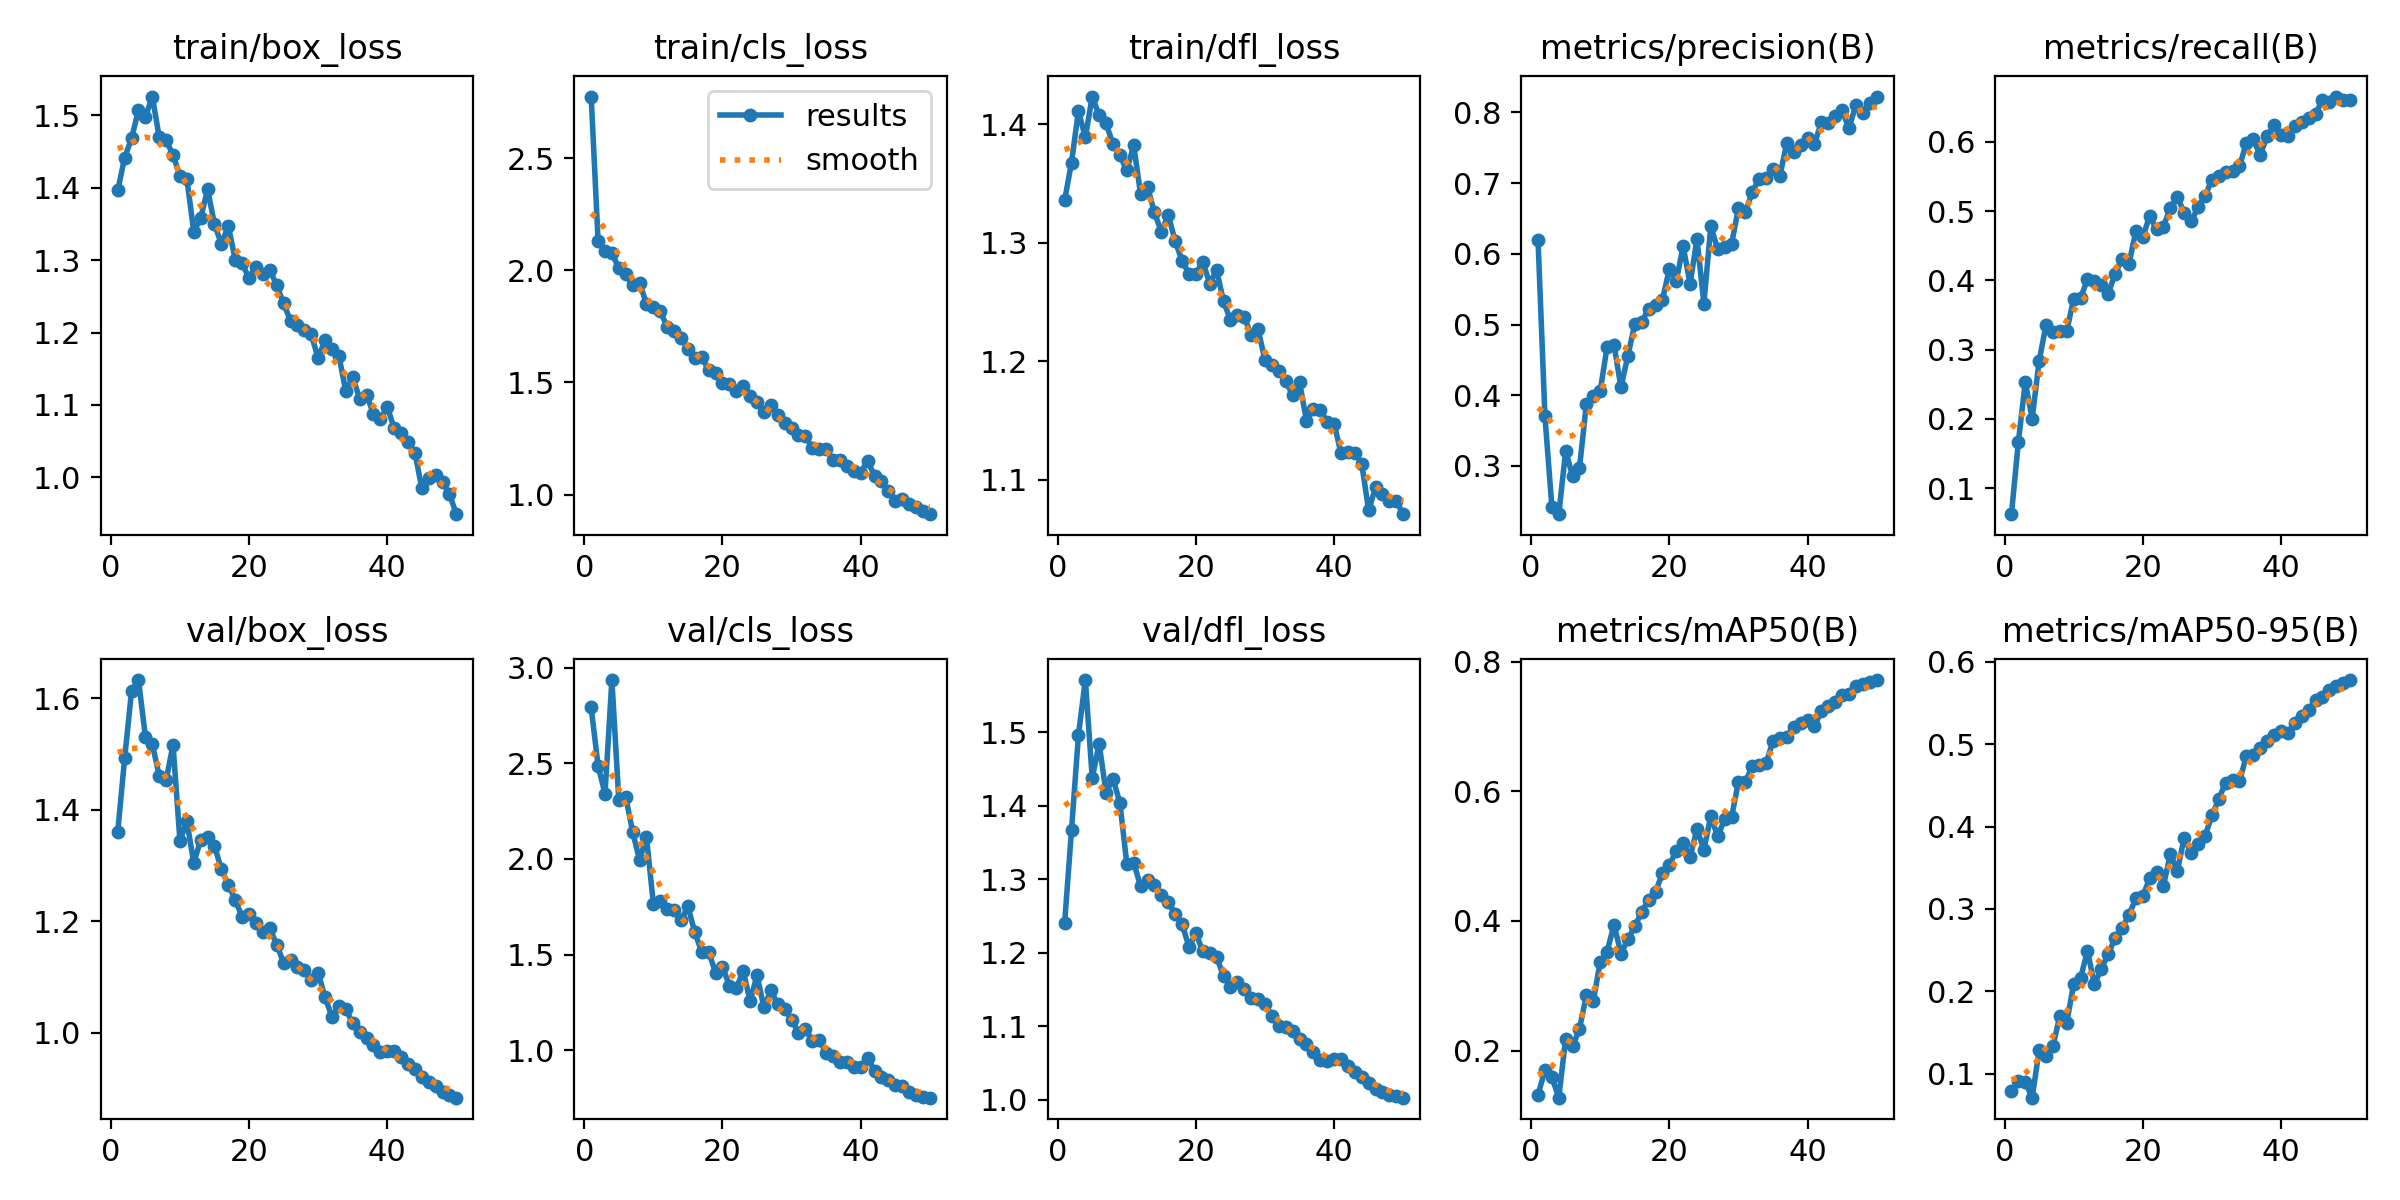

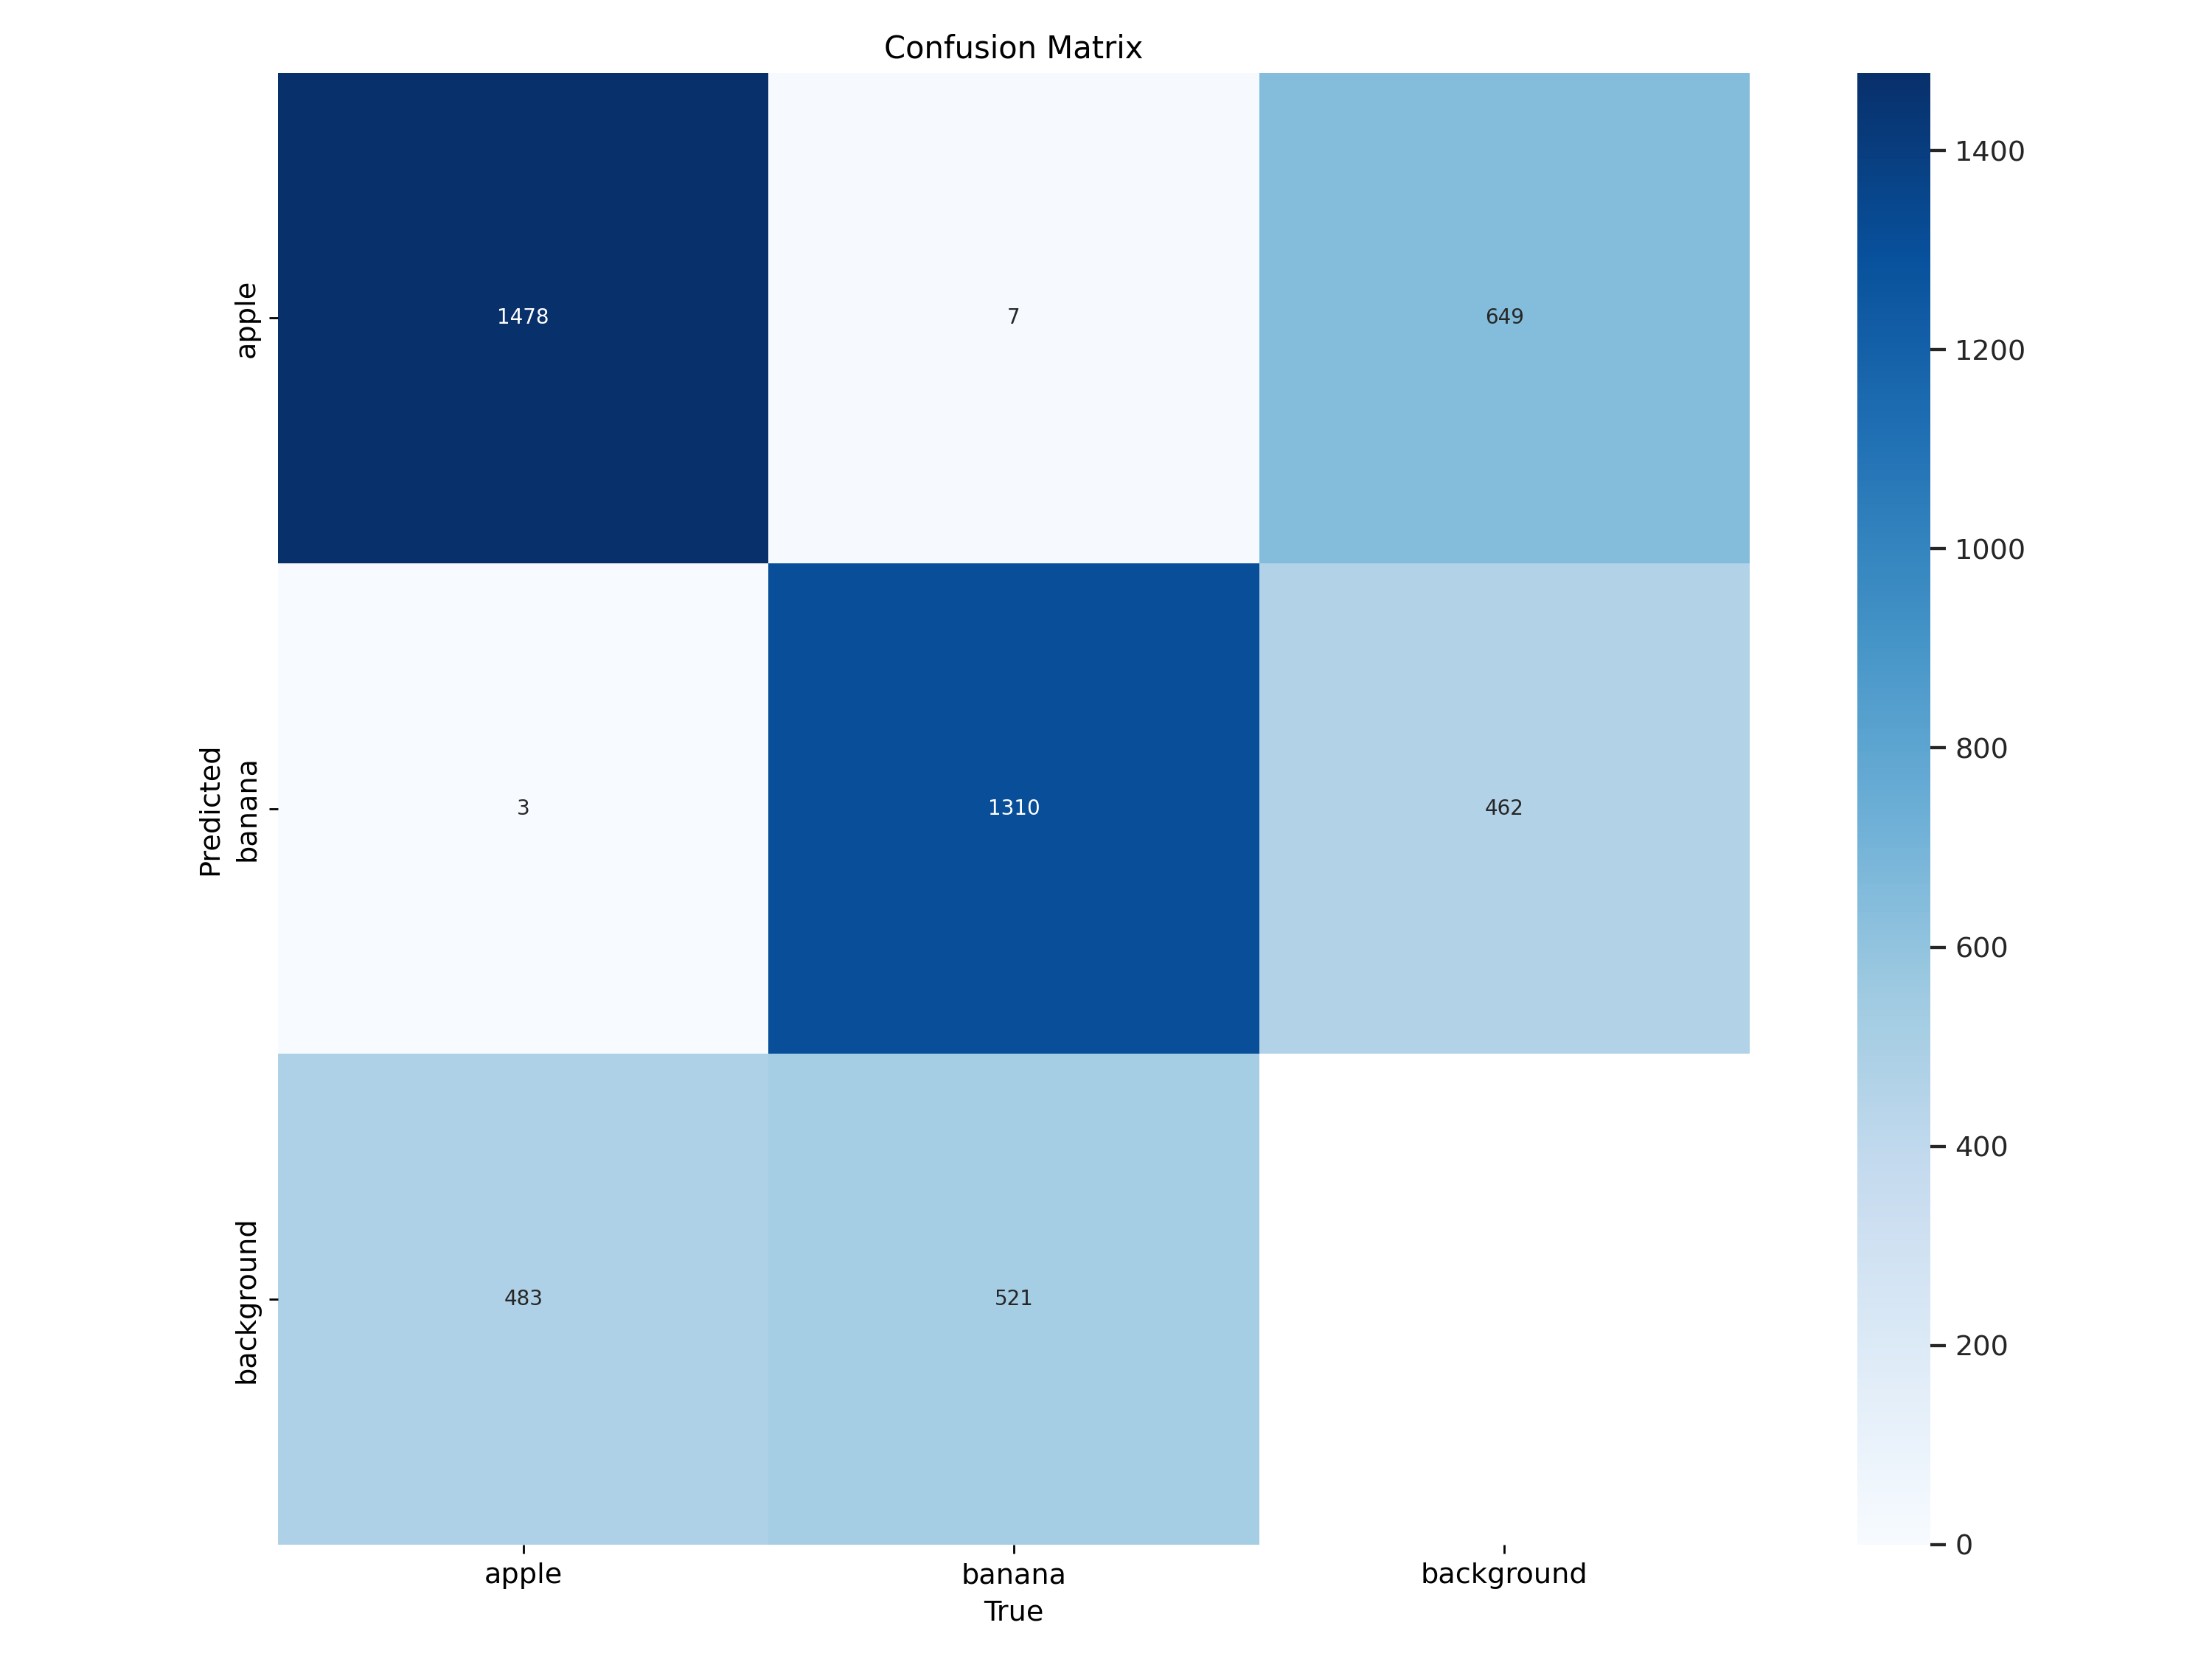

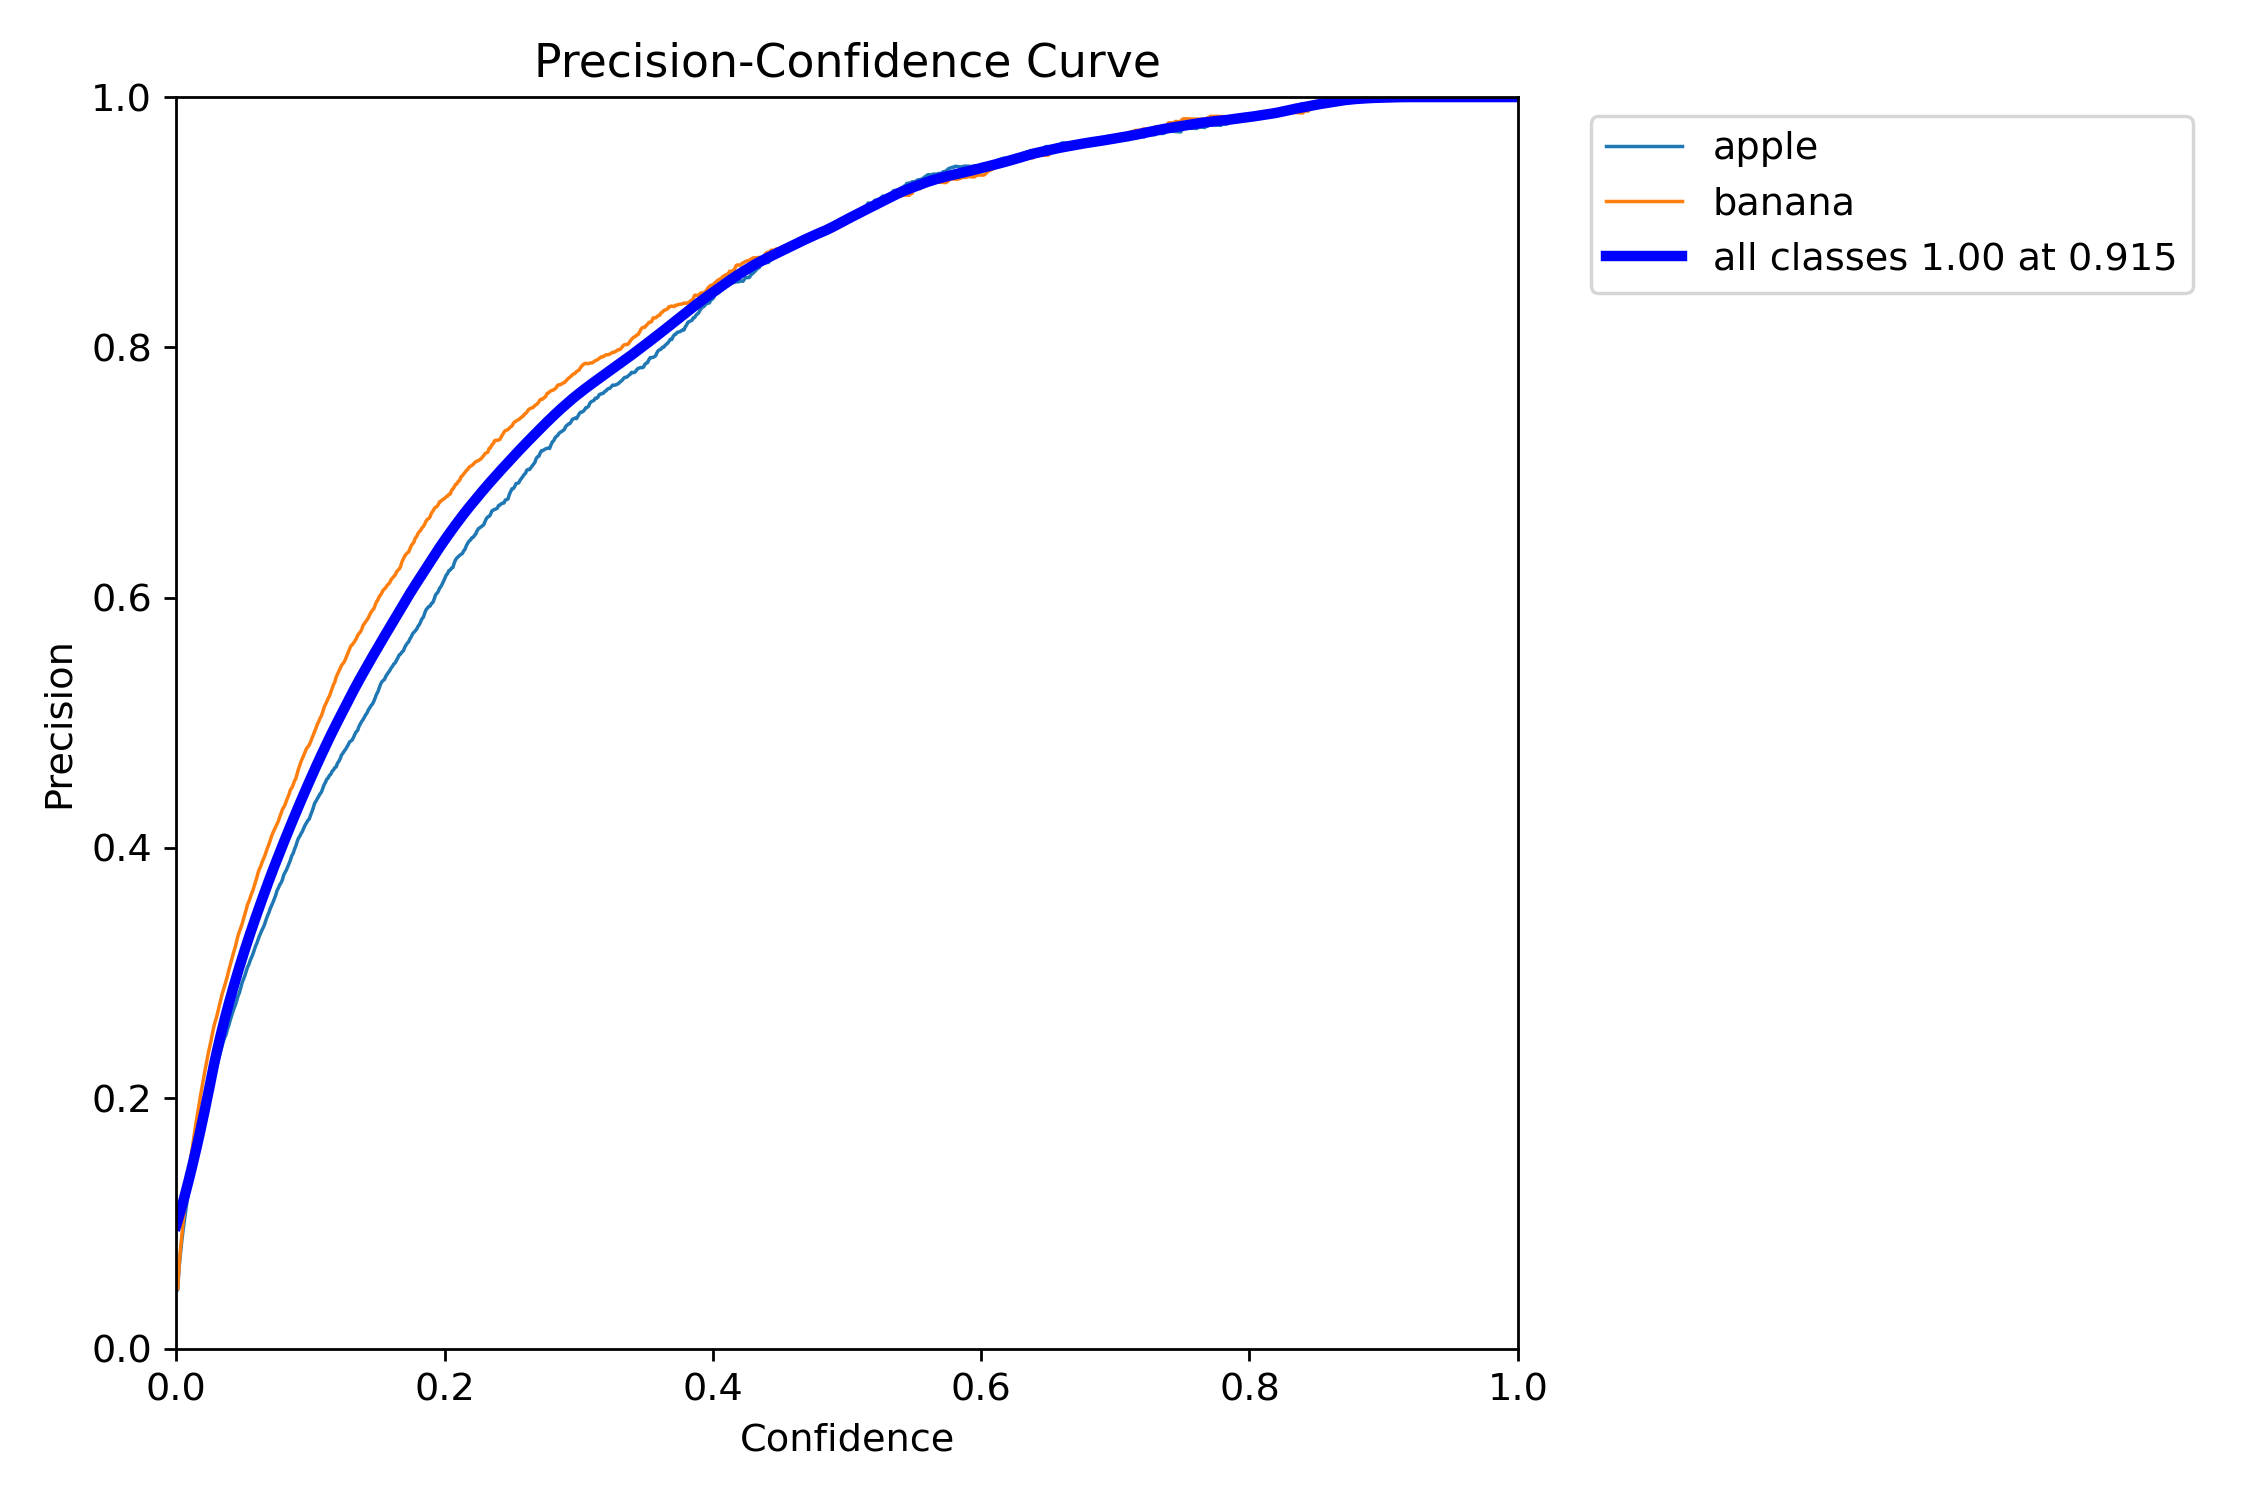

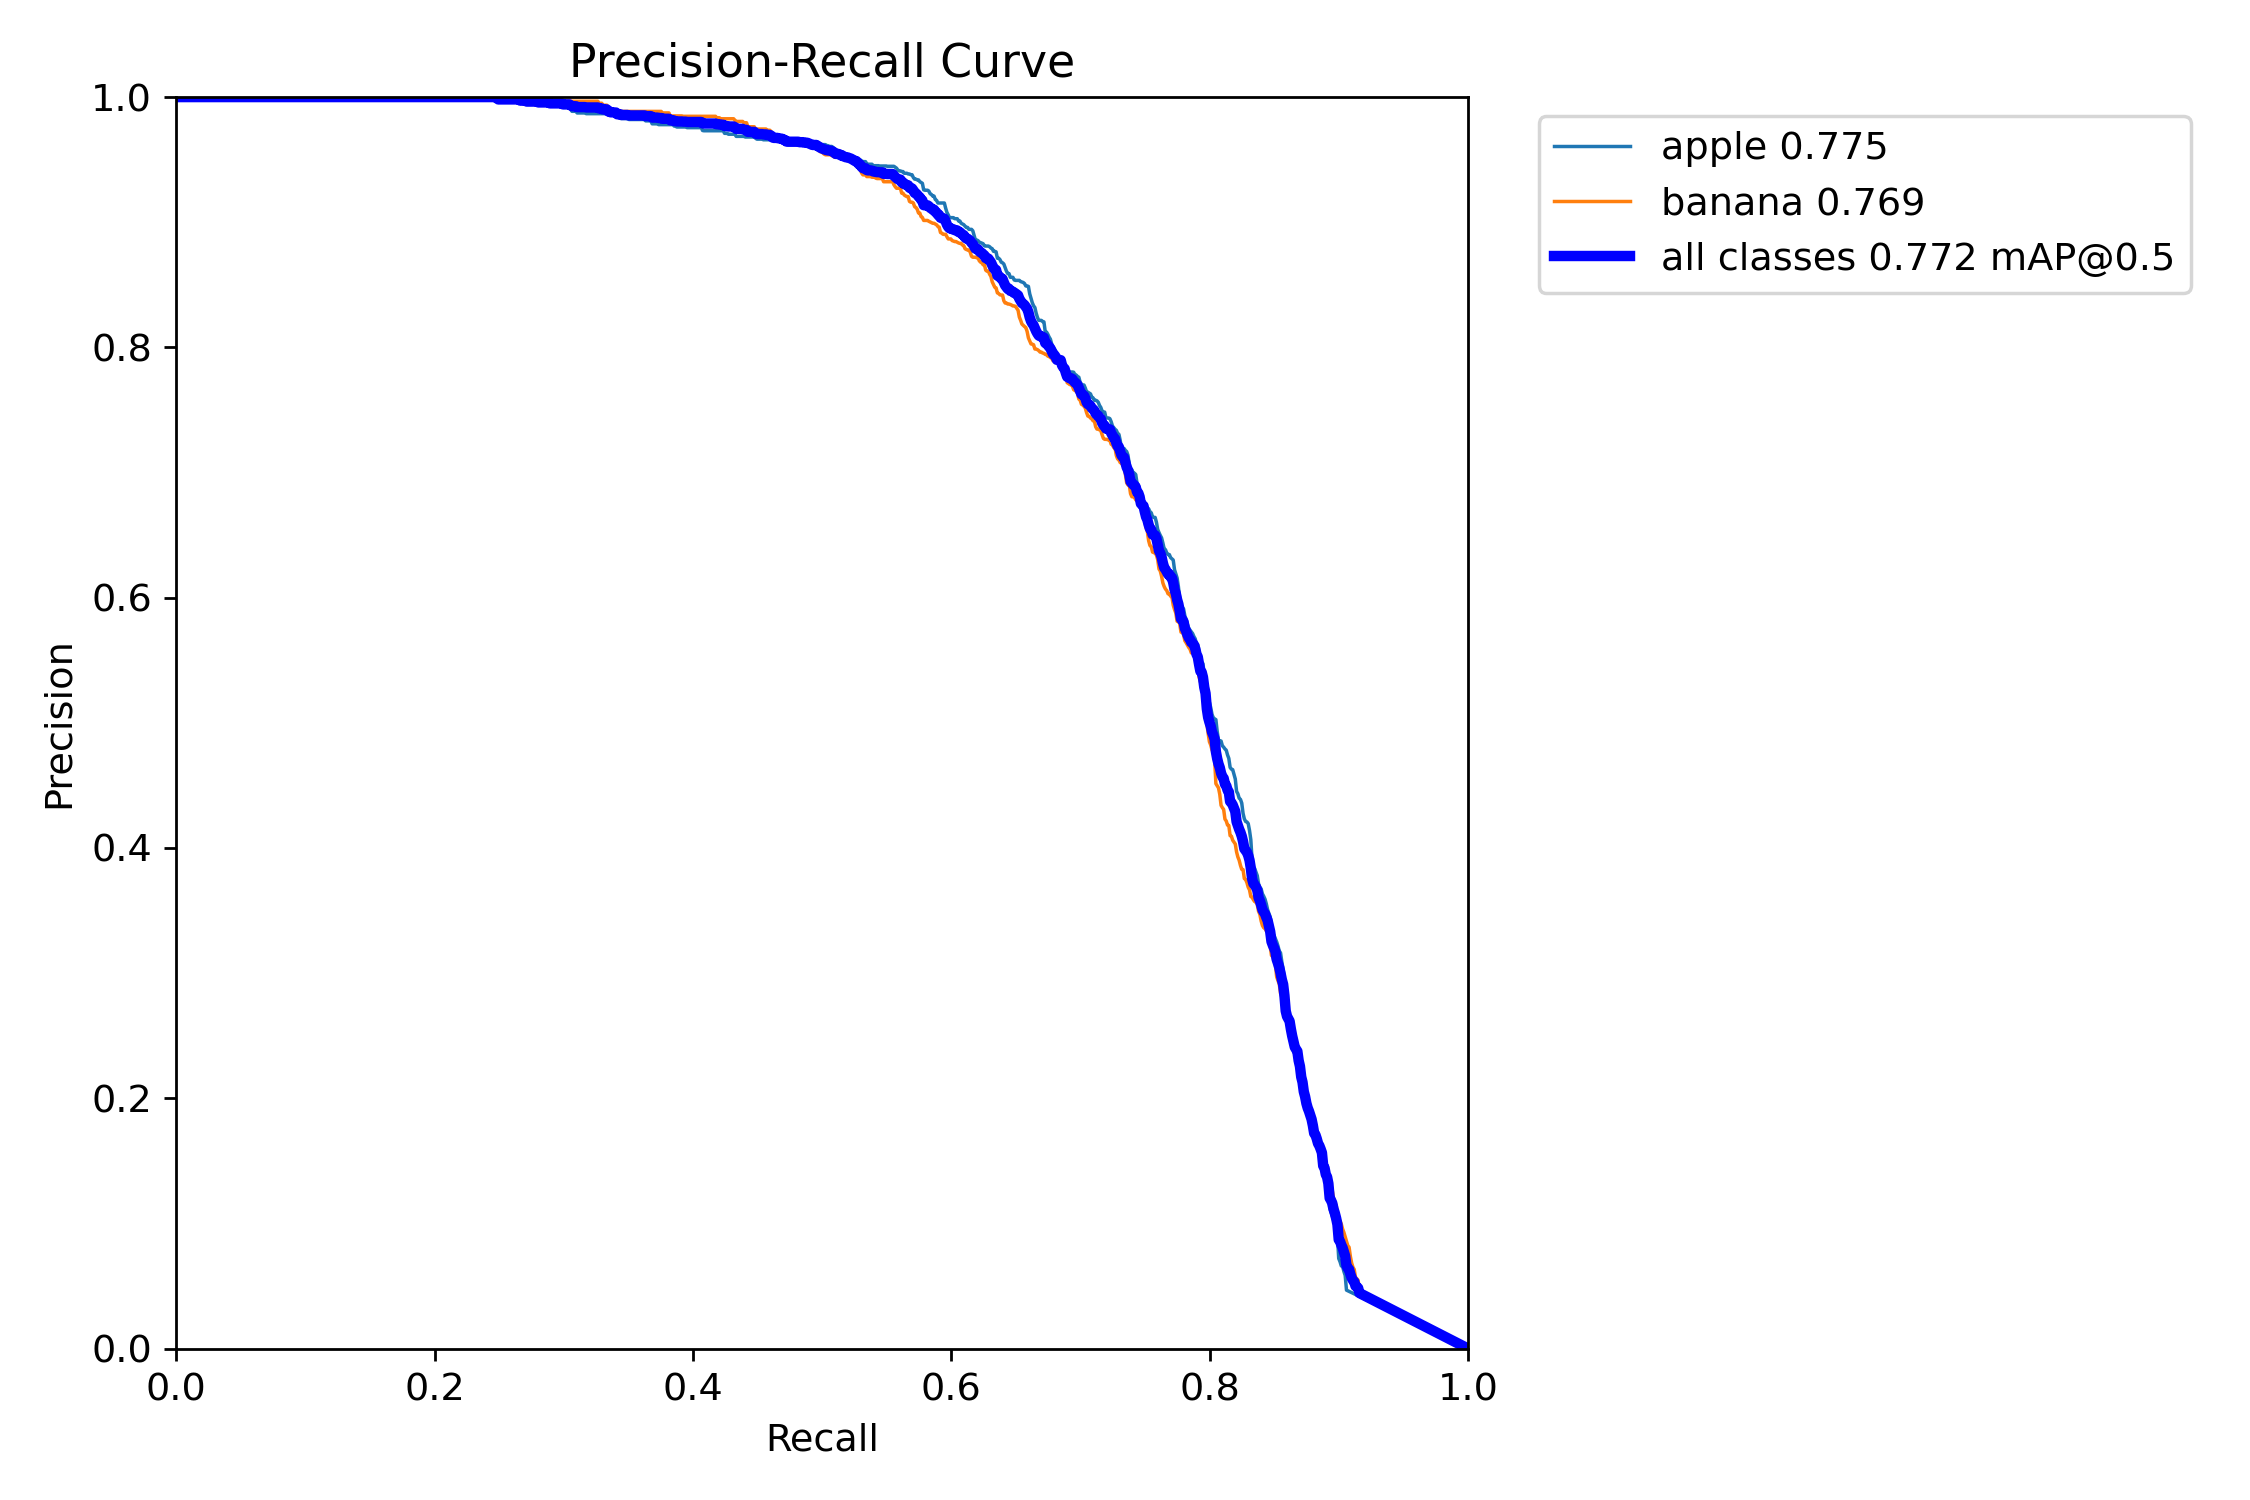

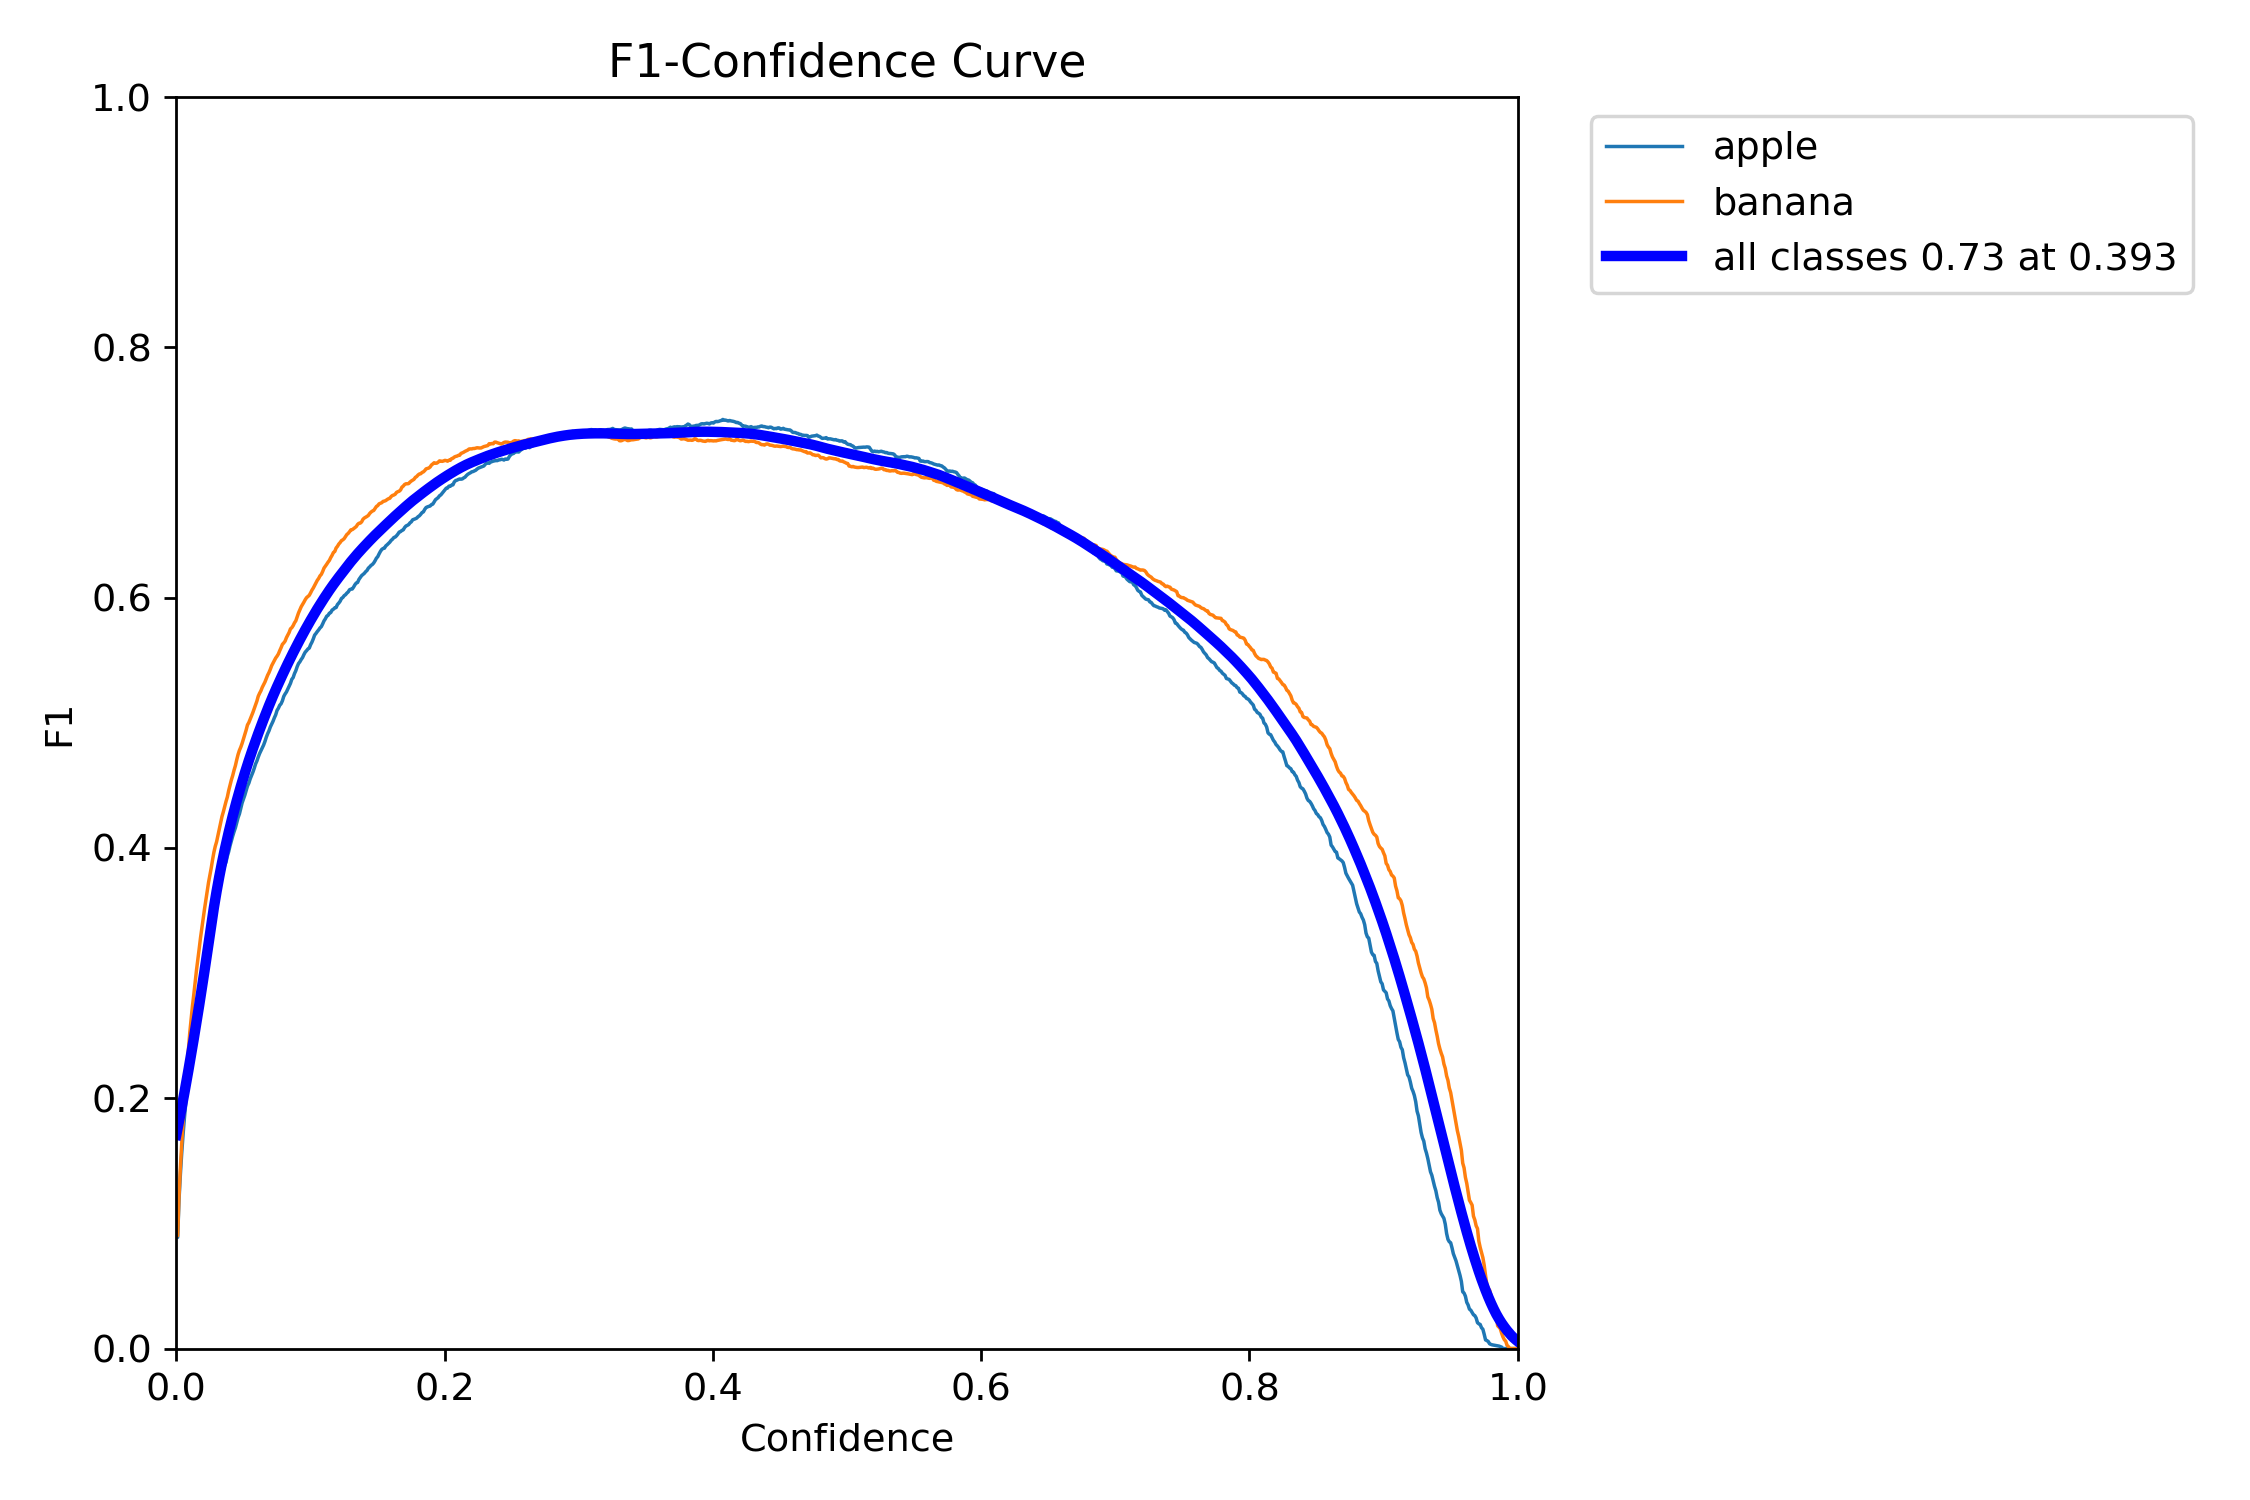

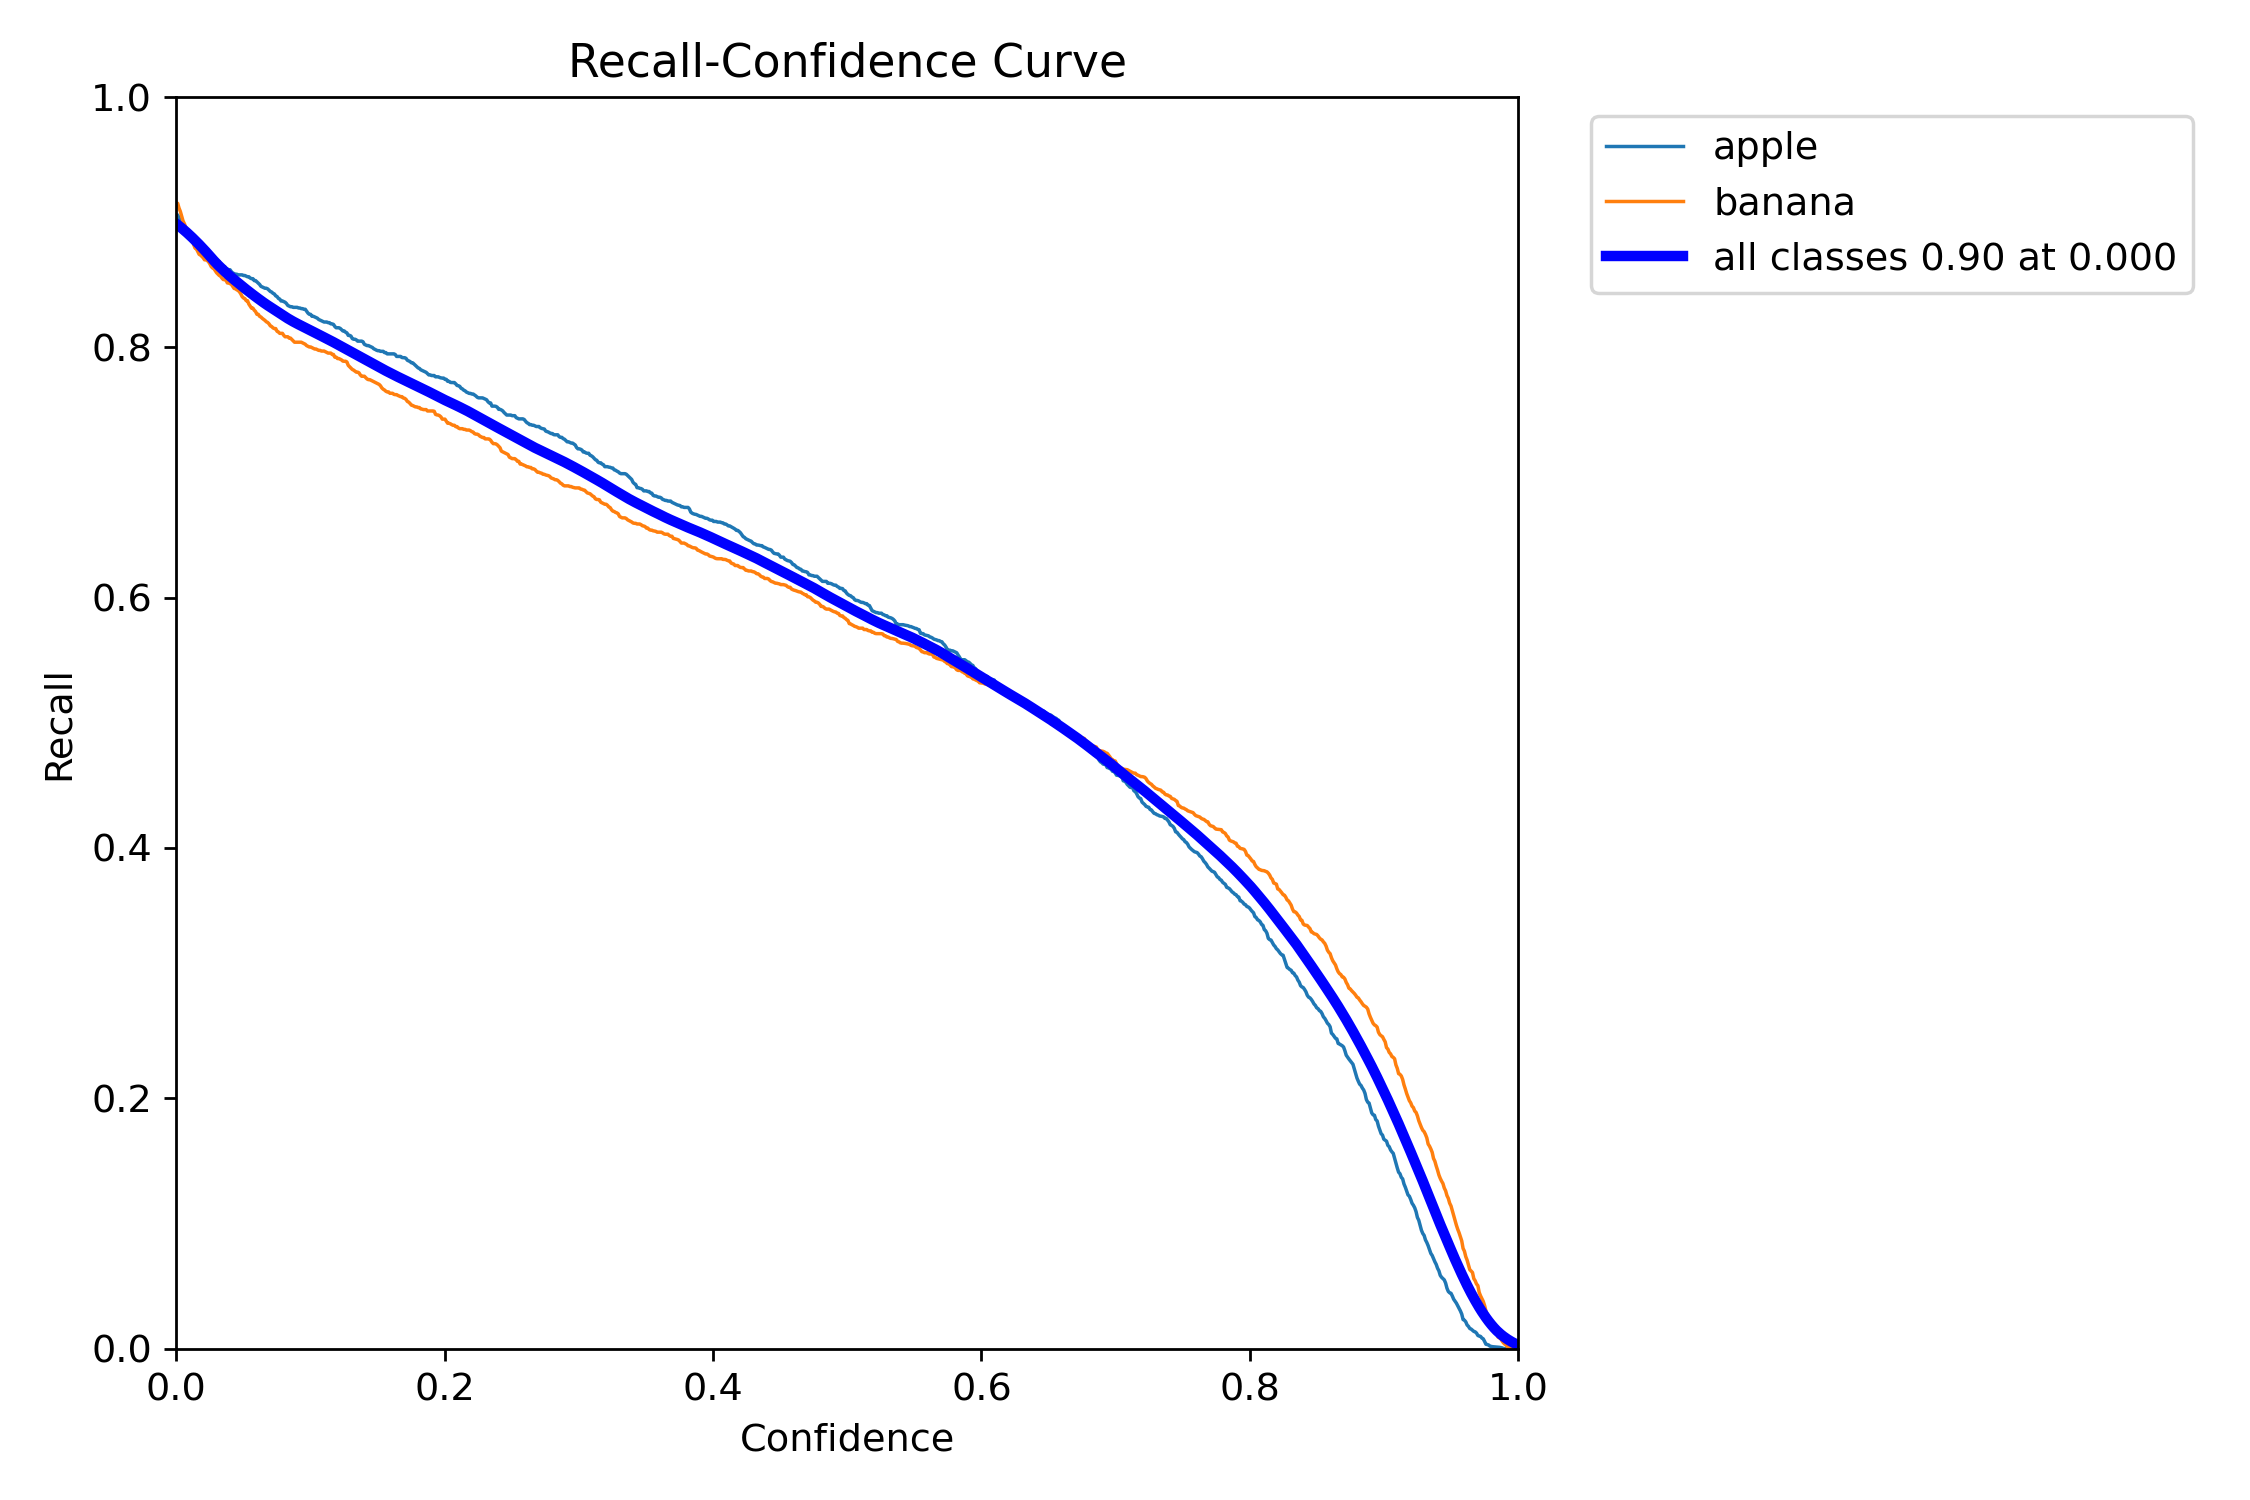

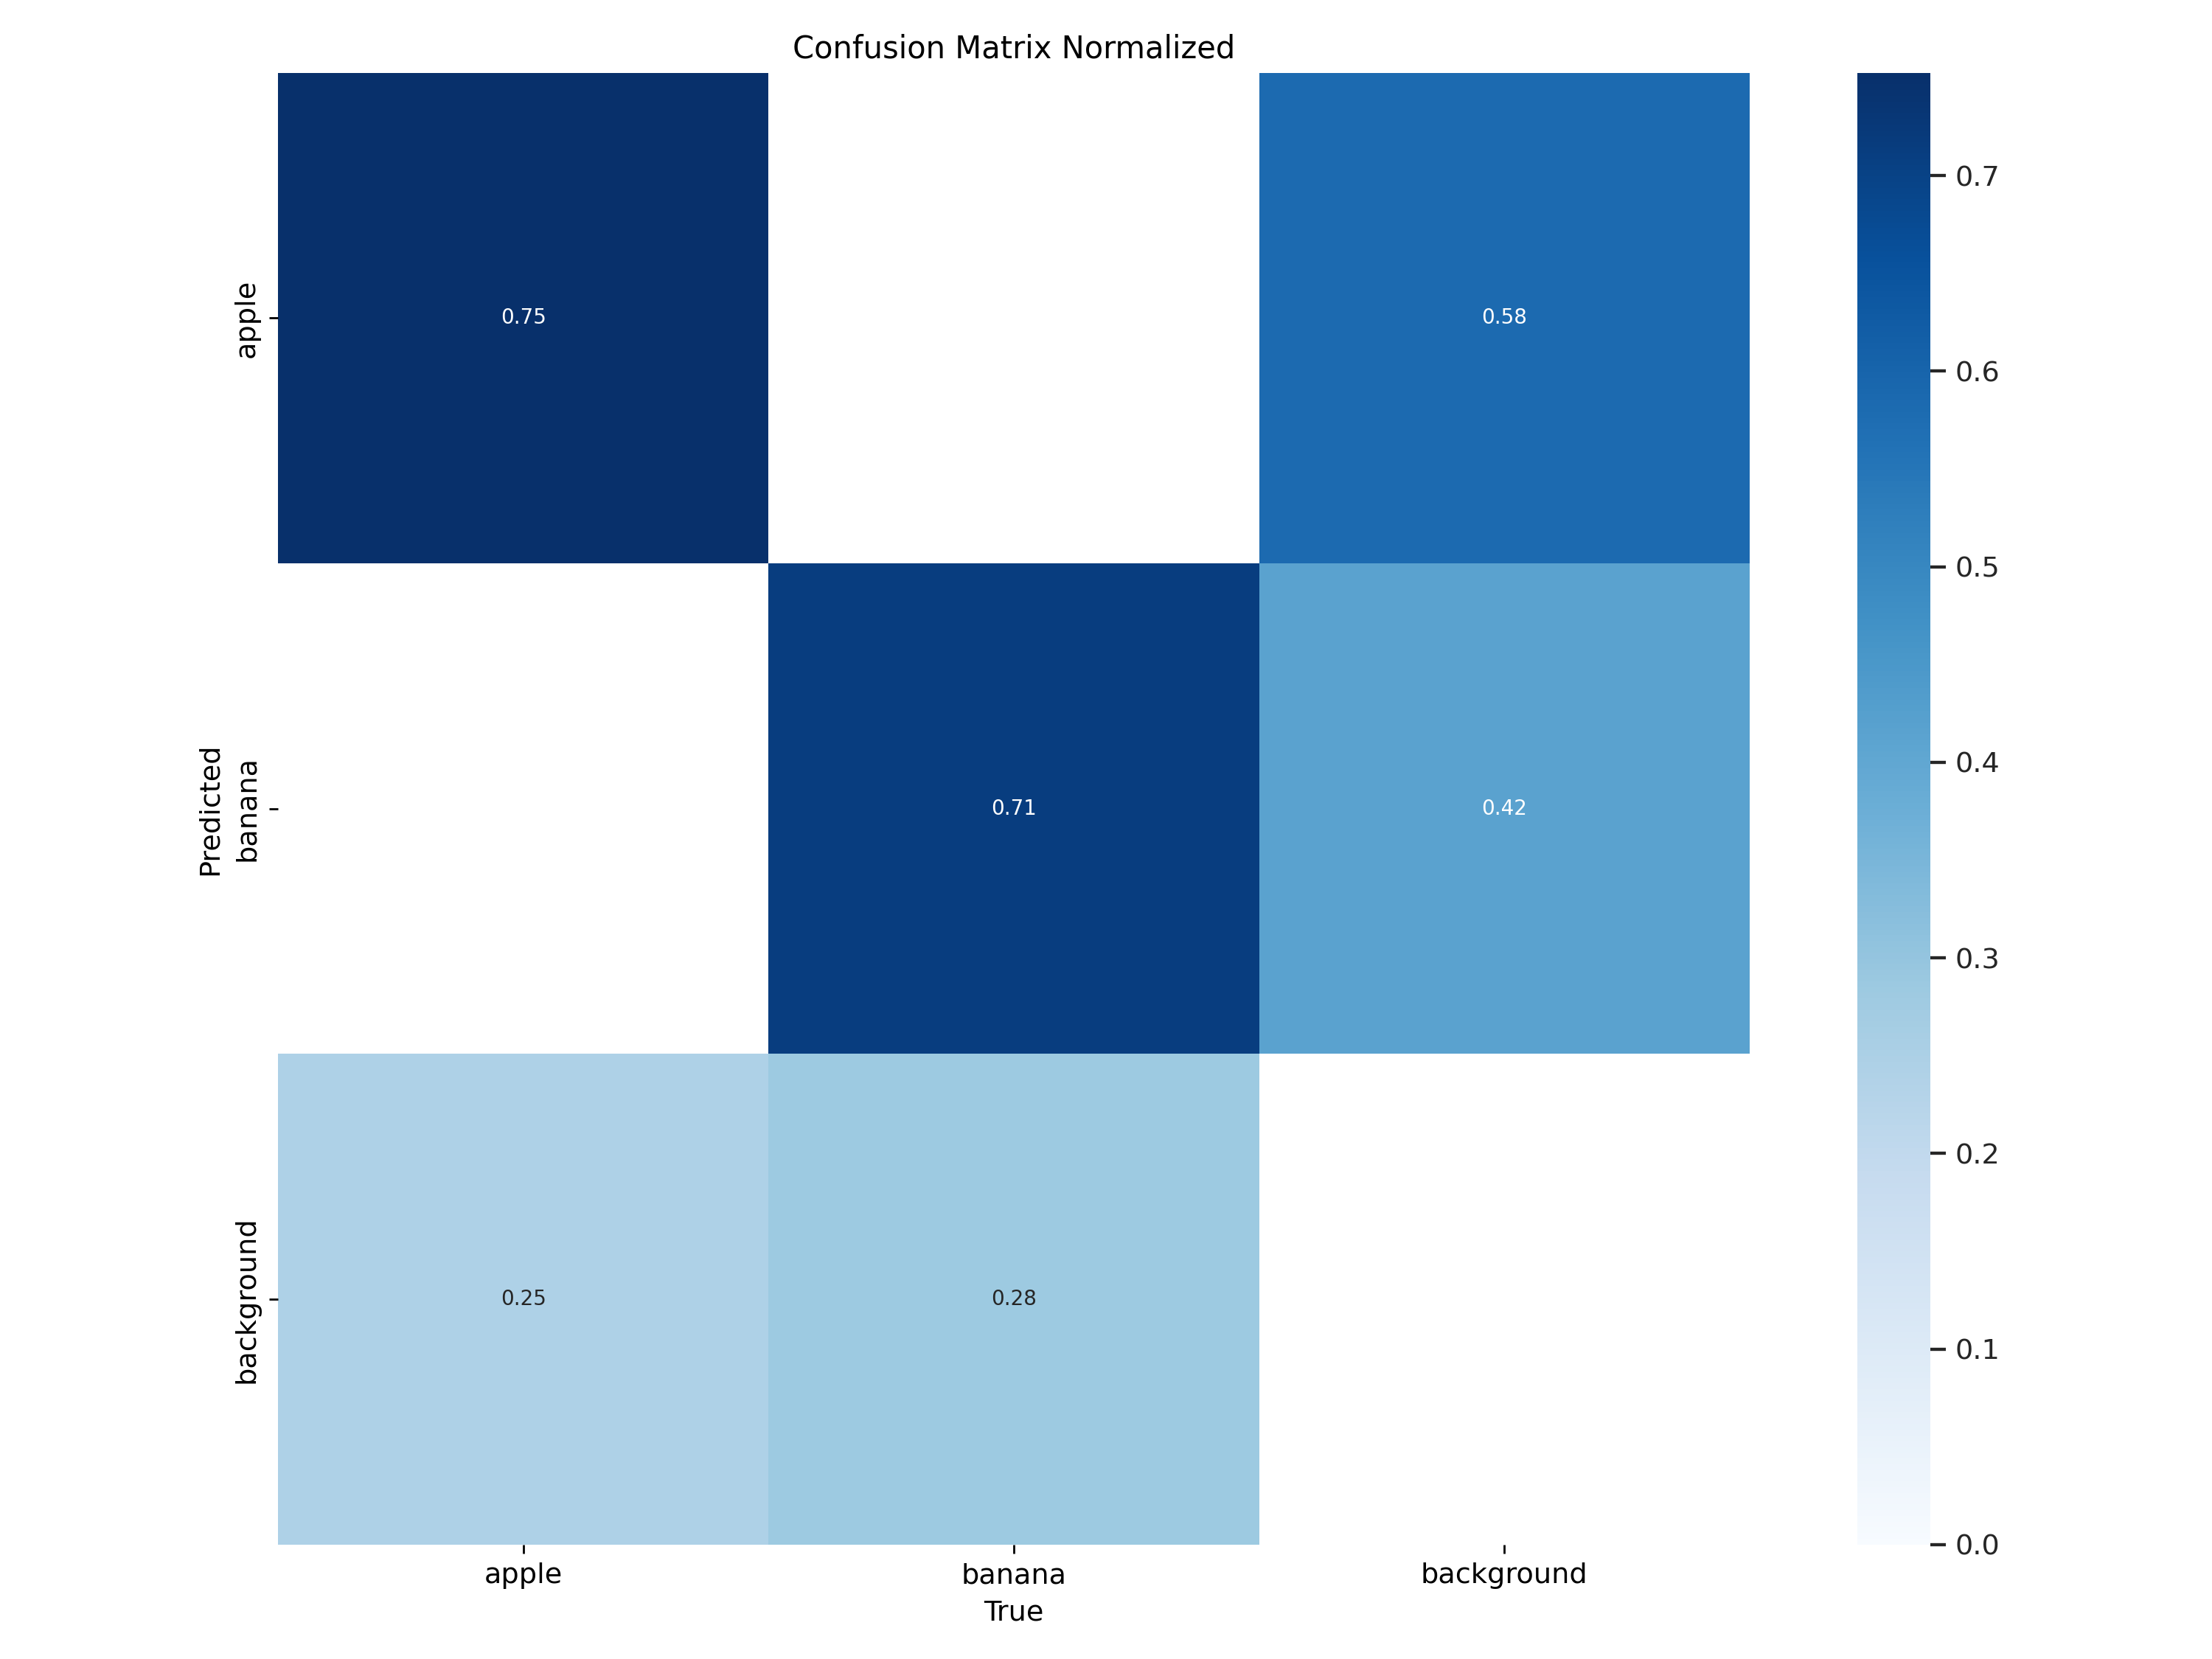

In [ ]:
import glob
import IPython.display as display
from IPython.display import Image

# Mostrar gráfico de perda do treinamento
image_path = glob.glob("/content/runs/detect/train/*.png")  # Arquivos gerados
for img in image_path:
    display.display(Image(img))


In [ ]:
import os

test_images = os.listdir("/content/yolo_dataset/images")
print(test_images)


['000000000902.jpg', '000000024714.jpg', '000000044993.jpg', '000000020966.jpg', '000000043251.jpg', '000000243558.jpg', '000000260715.jpg', '000000028864.jpg', '000000289187.jpg', '000000371222.jpg', '000000558362.jpg', '000000419350.jpg', '000000576780.jpg', '000000137320.jpg', '000000035741.jpg', '000000236425.jpg', '000000344758.jpg', '000000260748.jpg', '000000105768.jpg', '000000387678.jpg', '000000157288.jpg', '000000233366.jpg', '000000539777.jpg', '000000192319.jpg', '000000418372.jpg', '000000032665.jpg', '000000361933.jpg', '000000450914.jpg', '000000575916.jpg', '000000299794.jpg', '000000163180.jpg', '000000226658.jpg', '000000239596.jpg', '000000009511.jpg', '000000556715.jpg', '000000363554.jpg', '000000427464.jpg', '000000202888.jpg', '000000527155.jpg', '000000132538.jpg', '000000267788.jpg', '000000033946.jpg', '000000161941.jpg', '000000524924.jpg', '000000098434.jpg', '000000523373.jpg', '000000428502.jpg', '000000189539.jpg', '000000051630.jpg', '000000155860.jpg',

In [ ]:
test_image = "/content/yolo_dataset/images/NOME_DA_IMAGEM.jpg"  # Substitua pelo nome correto


In [ ]:
import os

image_folder = "/content/yolo_dataset/images"
if os.path.exists(image_folder):
    images = os.listdir(image_folder)
    print("Imagens encontradas:", images)
else:
    print("A pasta não existe!")


Imagens encontradas: ['000000000902.jpg', '000000024714.jpg', '000000044993.jpg', '000000020966.jpg', '000000043251.jpg', '000000243558.jpg', '000000260715.jpg', '000000028864.jpg', '000000289187.jpg', '000000371222.jpg', '000000558362.jpg', '000000419350.jpg', '000000576780.jpg', '000000137320.jpg', '000000035741.jpg', '000000236425.jpg', '000000344758.jpg', '000000260748.jpg', '000000105768.jpg', '000000387678.jpg', '000000157288.jpg', '000000233366.jpg', '000000539777.jpg', '000000192319.jpg', '000000418372.jpg', '000000032665.jpg', '000000361933.jpg', '000000450914.jpg', '000000575916.jpg', '000000299794.jpg', '000000163180.jpg', '000000226658.jpg', '000000239596.jpg', '000000009511.jpg', '000000556715.jpg', '000000363554.jpg', '000000427464.jpg', '000000202888.jpg', '000000527155.jpg', '000000132538.jpg', '000000267788.jpg', '000000033946.jpg', '000000161941.jpg', '000000524924.jpg', '000000098434.jpg', '000000523373.jpg', '000000428502.jpg', '000000189539.jpg', '000000051630.jpg'

In [ ]:
test_image = "/content/yolo_dataset/images/banana.jpg"  # Substitua aqui


In [ ]:
import os

# Verificar as imagens disponíveis no diretório
test_images_dir = '/content/yolo_dataset/images'
print(os.listdir(test_images_dir))


['000000000902.jpg', '000000024714.jpg', '000000044993.jpg', '000000020966.jpg', '000000043251.jpg', '000000243558.jpg', '000000260715.jpg', '000000028864.jpg', '000000289187.jpg', '000000371222.jpg', '000000558362.jpg', '000000419350.jpg', '000000576780.jpg', '000000137320.jpg', '000000035741.jpg', '000000236425.jpg', '000000344758.jpg', '000000260748.jpg', '000000105768.jpg', '000000387678.jpg', '000000157288.jpg', '000000233366.jpg', '000000539777.jpg', '000000192319.jpg', '000000418372.jpg', '000000032665.jpg', '000000361933.jpg', '000000450914.jpg', '000000575916.jpg', '000000299794.jpg', '000000163180.jpg', '000000226658.jpg', '000000239596.jpg', '000000009511.jpg', '000000556715.jpg', '000000363554.jpg', '000000427464.jpg', '000000202888.jpg', '000000527155.jpg', '000000132538.jpg', '000000267788.jpg', '000000033946.jpg', '000000161941.jpg', '000000524924.jpg', '000000098434.jpg', '000000523373.jpg', '000000428502.jpg', '000000189539.jpg', '000000051630.jpg', '000000155860.jpg',

In [ ]:
test_image = '/content/yolo_dataset/images/apple.jpg'  # Substitua pelo nome correto da imagem


In [ ]:
import os

# Verificar as imagens no diretório
test_images_dir = '/content/yolo_dataset/images'
images = os.listdir(test_images_dir)
print(images)


['000000000902.jpg', '000000024714.jpg', '000000044993.jpg', '000000020966.jpg', '000000043251.jpg', '000000243558.jpg', '000000260715.jpg', '000000028864.jpg', '000000289187.jpg', '000000371222.jpg', '000000558362.jpg', '000000419350.jpg', '000000576780.jpg', '000000137320.jpg', '000000035741.jpg', '000000236425.jpg', '000000344758.jpg', '000000260748.jpg', '000000105768.jpg', '000000387678.jpg', '000000157288.jpg', '000000233366.jpg', '000000539777.jpg', '000000192319.jpg', '000000418372.jpg', '000000032665.jpg', '000000361933.jpg', '000000450914.jpg', '000000575916.jpg', '000000299794.jpg', '000000163180.jpg', '000000226658.jpg', '000000239596.jpg', '000000009511.jpg', '000000556715.jpg', '000000363554.jpg', '000000427464.jpg', '000000202888.jpg', '000000527155.jpg', '000000132538.jpg', '000000267788.jpg', '000000033946.jpg', '000000161941.jpg', '000000524924.jpg', '000000098434.jpg', '000000523373.jpg', '000000428502.jpg', '000000189539.jpg', '000000051630.jpg', '000000155860.jpg',

In [ ]:
c


image 1/1 /content/yolo_dataset/images/banana.jpg: 576x640 (no detections), 11.0ms
Speed: 5.4ms preprocess, 11.0ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 640)


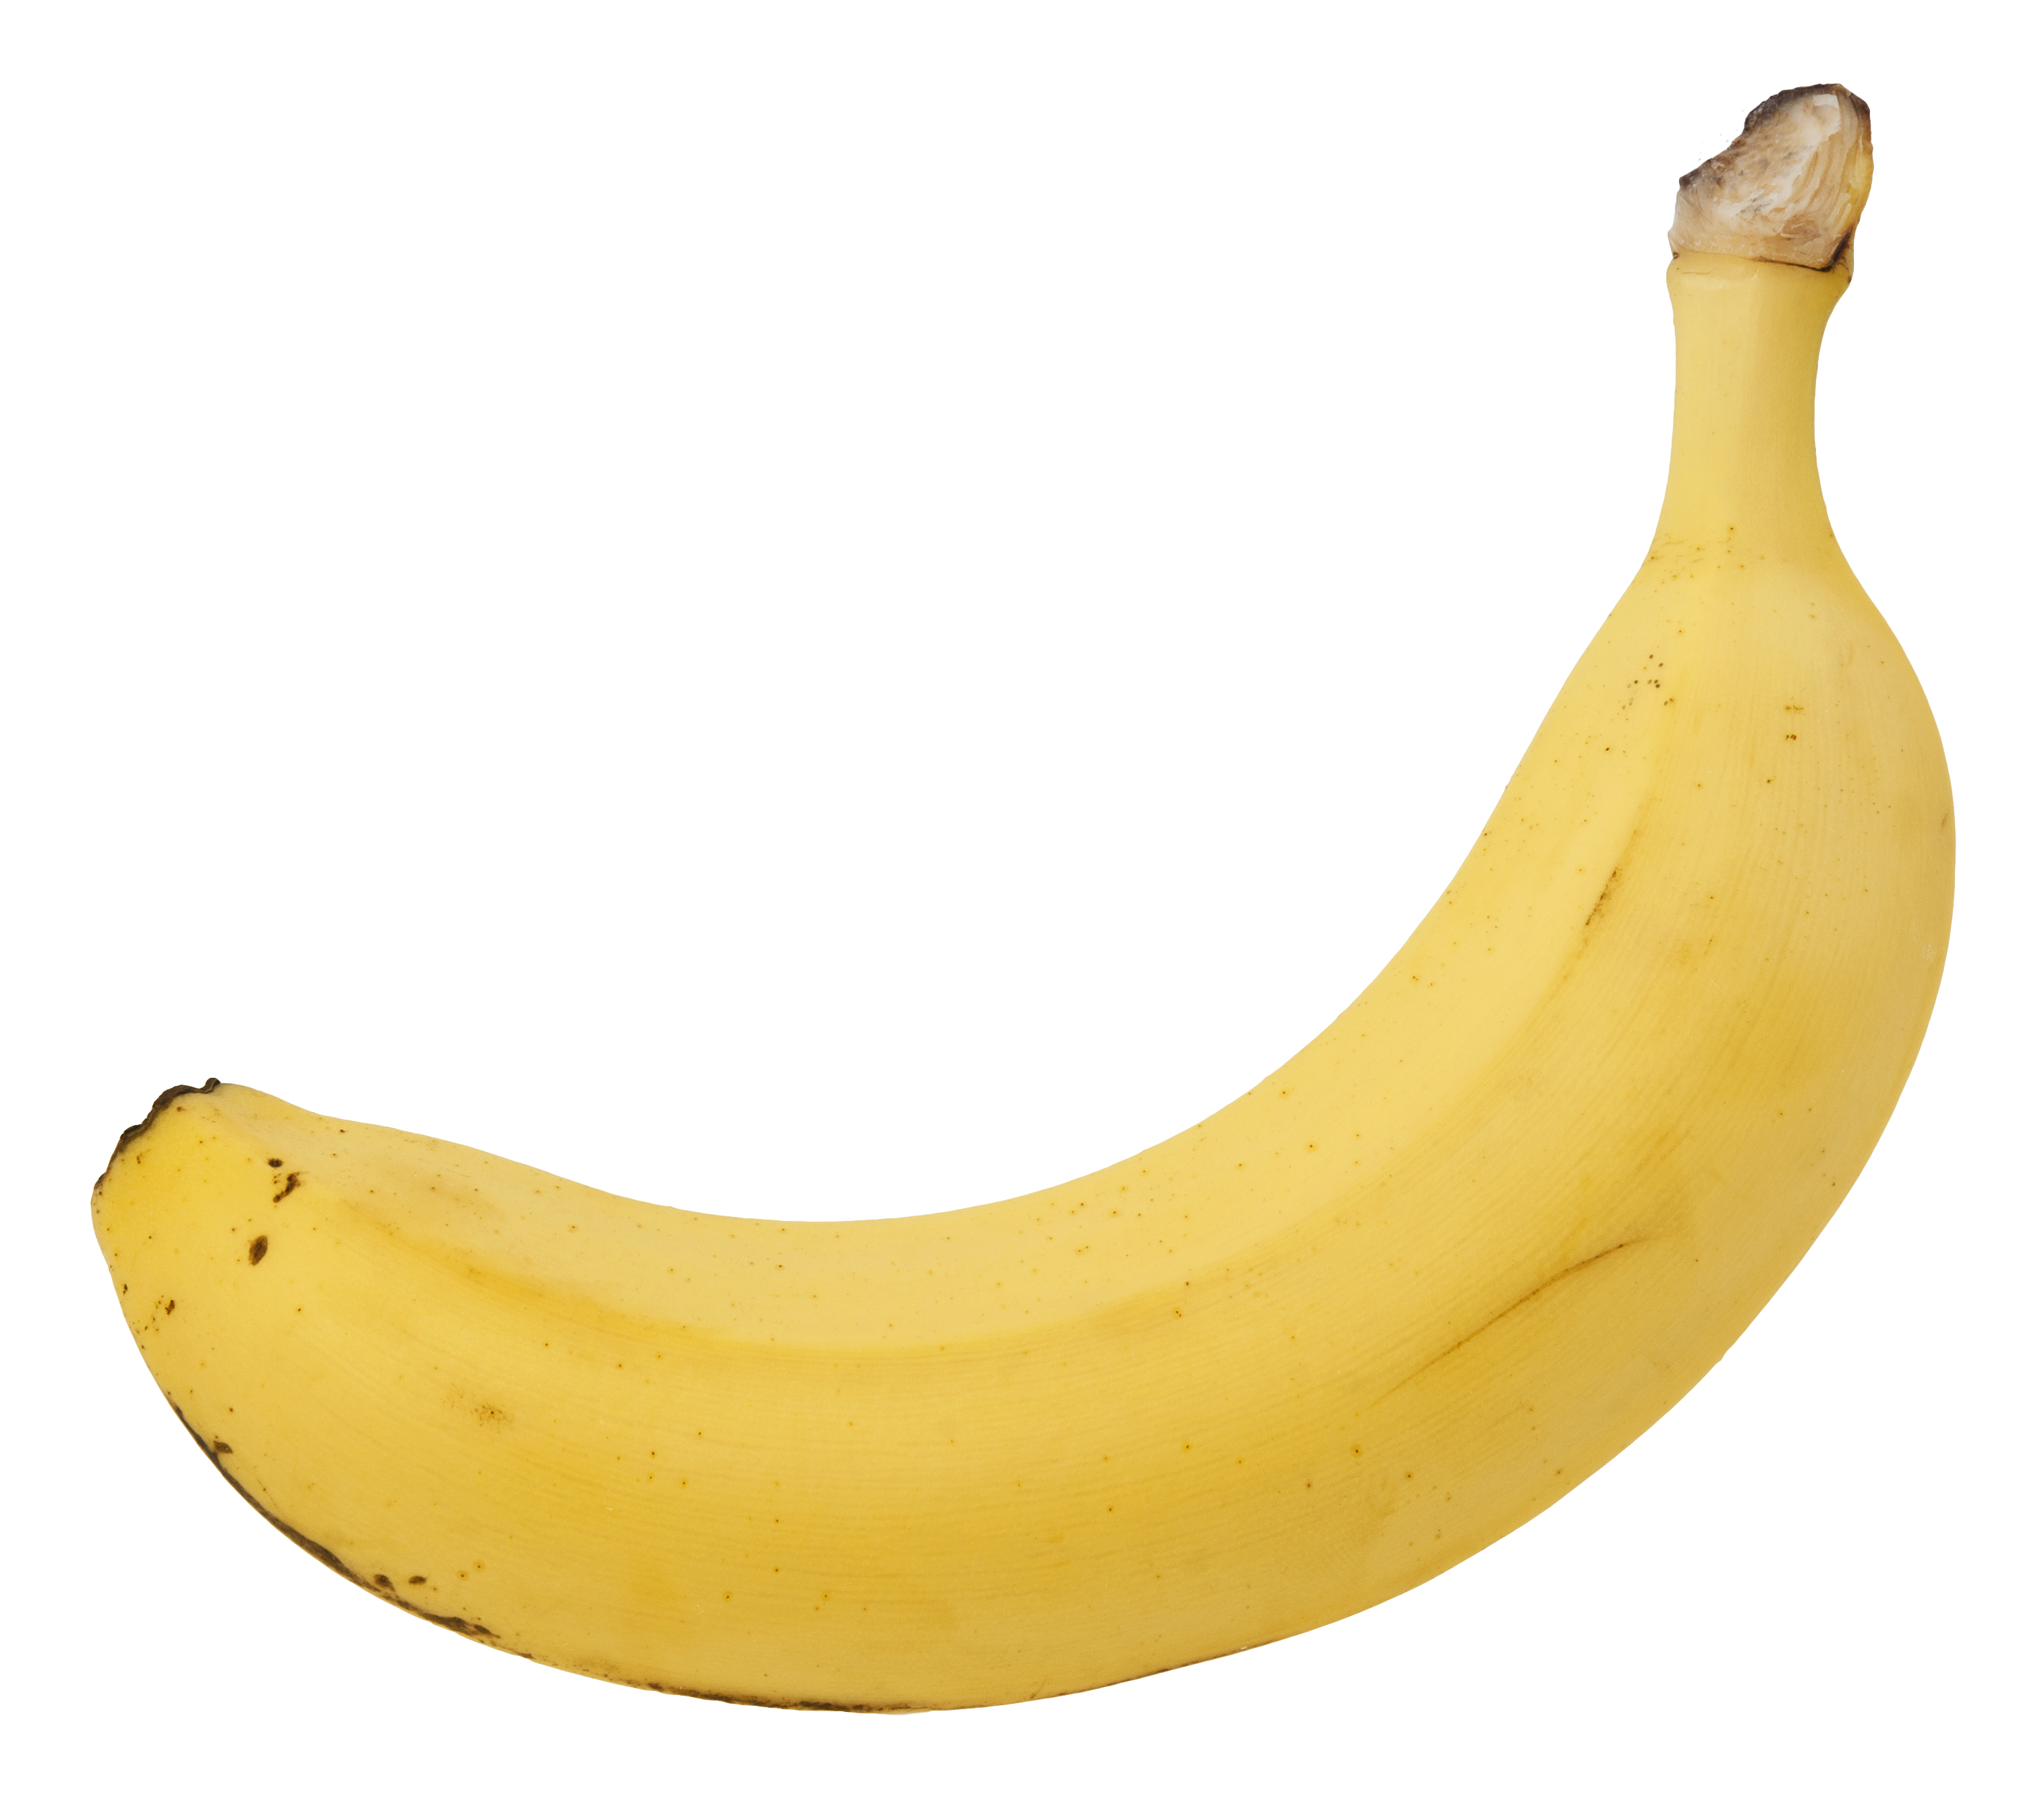

In [ ]:
results = model(test_image)
results[0].show()  # Exibir a imagem com as detecções
